# Image to Litematic converter

Example of what gave the Chromatica Album cover with a 512x512 map :

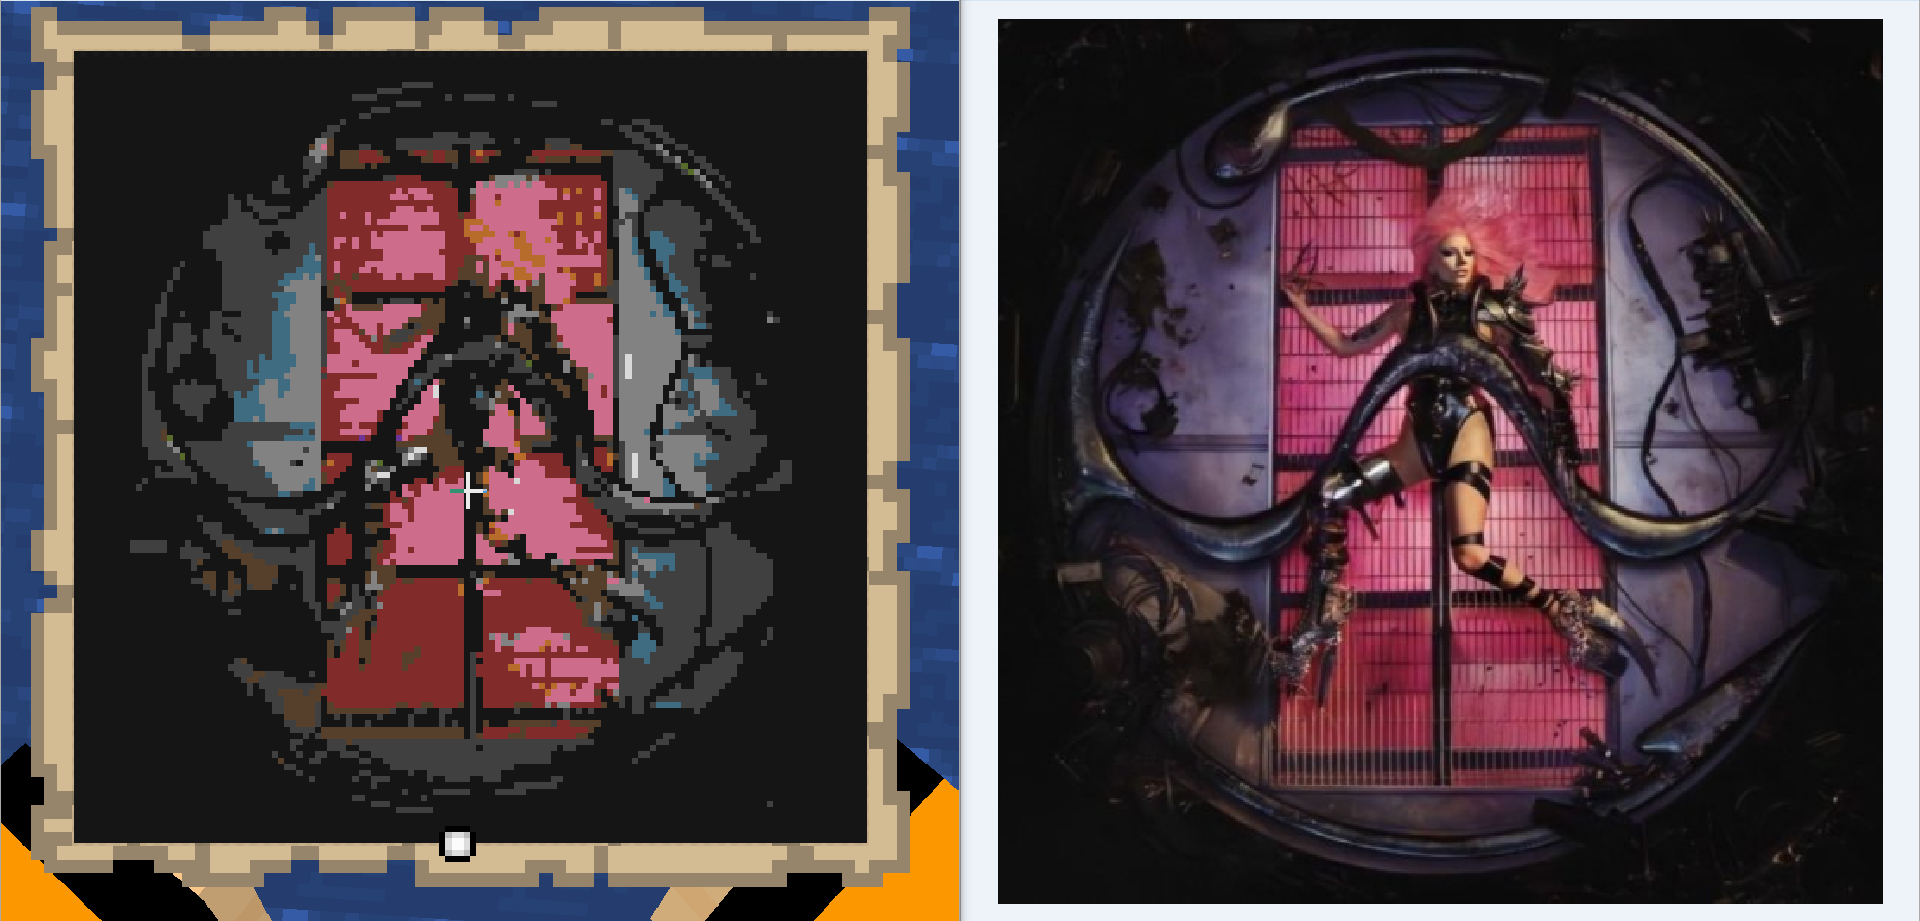

## Creating environment

Installing litemapy a library to create litematic file easily.

Importing all required libraries. 

In [ ]:
%pip install litemapy
import shutil
shutil.rmtree('sample_data/', ignore_errors=True)

import os
from time import time
import math
from PIL import Image as im
import litemapy as lm
from google.colab import files

## Initialisation 

In [ ]:
#@title Choose if you want air blocks (to get the ocean color or not)
canUseOcean = True #@param {type:"boolean"}

block_colors = {}
block_colors[(217, 217, 217)] = 'white_carpet'
block_colors[(184, 108, 43)] = 'orange_carpet'
block_colors[(151, 64, 184)] = 'magenta_carpet'
block_colors[(57, 82, 184)] = 'light_blue_carpet'
block_colors[(195, 195, 43)] = 'yellow_carpet'
block_colors[(108, 174, 21)] = 'lime_carpet'
block_colors[(206, 108, 140)] = 'pink_carpet'
block_colors[(64, 64, 64)] = 'gray_carpet'
block_colors[(130, 130, 130)] = 'light_gray_carpet'
block_colors[(64, 108, 130)] = 'cyan_carpet'
block_colors[(108, 53, 151)] = 'purple_carpet'
block_colors[(43, 64, 151)] = 'blue_carpet'
block_colors[(87, 64, 43)] = 'brown_carpet'
block_colors[(87, 108, 43)] = 'green_carpet'
block_colors[(130, 43, 43)] = 'red_carpet'
block_colors[(21, 21, 21)] = 'black_carpet'
if canUseOcean :
    block_colors[(44, 44, 178)] = 'air'

## Color processing methods

Based on a [stackoverflow thread](https://stackoverflow.com/questions/34366981/python-pil-finding-nearest-color-rounding-colors)

In [ ]:
def findNearestColor(color, silent=True):
    colors = list(block_colors.keys())
    colors.sort(key=lambda existing_color: distance(color, existing_color))
    nearestBlockColor = colors[0]
    if not silent:
        print("minecraft:{} ({}, {}, {})".format(block_colors[nearestBlockColor], nearestBlockColor[0],
                                                 nearestBlockColor[1], nearestBlockColor[2]))
    return "minecraft:{}".format(block_colors[nearestBlockColor])


def distance(c1, c2):
    (r1, g1, b1) = c1
    (r2, g2, b2) = c2
    return math.sqrt((r1 - r2) ** 2 + (g1 - g2) ** 2 + (b1 - b2) ** 2)

## Main method

Basically for each pixel of the input image, it finding the block with nearest color and then setting it to the litematic at same coordinates.

In [ ]:
def convertToLitematic(imagePath, verbose: int = 0, cacheEnabled=False, displayDuration=False):
    litematicName = os.path.basename(imagePath).split('.')[0]
    img = im.open(imagePath)
    if displayDuration:
        duration = time()
    if verbose > 0:
        print("Litematic Name : ", litematicName)
        print("Image format : ", img.format)
        print("Image size : ", img.size)
        print("Color mode : ", img.mode)

    assert img.size[0] == img.size[1]
    assert img.size[0] in [128, 256, 512, 1024, 2048]

    size = img.size[0]
    schem = lm.Schematic(size, 1, size,
                         name=litematicName,
                         author="Image to Litematic Converter",
                         description="Made with Image to Litematic Converter using litemapy",
                         main_region_name=litematicName)
    reg = schem.regions[litematicName]

    cache = {}
    print("Starting {} map".format(litematicName))
    for x in range(size):
        if verbose > 0:
            print("Starting line {}/{}".format(x + 1, size))

        for z in range(size):

            px = img.getpixel((x, z))
            if px not in cache:
                color = findNearestColor(px, silent=False if verbose > 1 else True)
                if cacheEnabled:
                    cache[px] = color
            else:
                color = cache[px]
            block = lm.BlockState(color)
            reg.setblock(x, 0, z, block)

        if verbose > 0 and cacheEnabled:
            print("Cache length : ", len(cache))

        if x == size / 4 :
            print("\t25% Done")
        elif x == size / 2:
            print("\t50% Done")
        elif x == (size / 4) * 3:
            print("\t75% Done")

    schem.updatemeta()
    schem.save("{}.litematic".format(litematicName))
    print("\tLitematic saved")
    if displayDuration:
        duration = round(time() - duration)
        print("\tDuration : ", duration, "s")
    print()
    return litematicName + ".litematic"

## Start conversion

Upload the image(s) you want to convert as map and then download the resulting map(s).

May have to restart this cell when first launched.

In [ ]:
uploaded = files.upload()
print()
for fileName in uploaded:
    files.download(convertToLitematic(fileName, displayDuration=True))

